## ***AIM - Apply any of the following learning algorithms to learn the parameters of the supervised single layer feed forward neural network,***
     
1.   Stochastic Gradient Descent
2.   Mini Batch Gradient Descent
3.   Momentum GD

### ***YASH ASHOK SHIRSATH AI&DS 65 DL EXP 4***

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
# Initialize parameters
weights = np.random.randn(1, 1)
bias = np.random.randn(1)
learning_rate = 0.01
n_iterations = 1000
batch_size = 20  # for mini-batch gradient descent

In [5]:
# Loss function
def compute_loss(X, y, weights, bias):
    m = len(y)
    predictions = X.dot(weights) + bias
    return (1/2*m) * np.sum(np.square(predictions - y))

In [6]:
# Gradient Descent Function
def gradient_descent(X, y, weights, bias, learning_rate, n_iterations, method="batch", batch_size=20):
    m = len(y)
    loss_history = []

    for i in range(n_iterations):
        if method == "batch":
            predictions = X.dot(weights) + bias
            error = predictions - y
            weights_gradient = (1/m) * X.T.dot(error)
            bias_gradient = (1/m) * np.sum(error)
        elif method == "stochastic":
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            predictions = X_i.dot(weights) + bias
            error = predictions - y_i
            weights_gradient = 2 * X_i.T.dot(error)
            bias_gradient = 2 * np.sum(error)
        elif method == "mini_batch":
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for start_idx in range(0, m, batch_size):
                end_idx = start_idx + batch_size
                X_i = X_shuffled[start_idx:end_idx]
                y_i = y_shuffled[start_idx:end_idx]
                predictions = X_i.dot(weights) + bias
                error = predictions - y_i
                weights_gradient = (2/batch_size) * X_i.T.dot(error)
                bias_gradient = (2/batch_size) * np.sum(error)
                weights -= learning_rate * weights_gradient
                bias -= learning_rate * bias_gradient

        if method != "mini_batch":
            weights -= learning_rate * weights_gradient
            bias -= learning_rate * bias_gradient

        loss = compute_loss(X, y, weights, bias)
        loss_history.append(loss)

    return weights, bias, loss_history

In [7]:
# Train with Batch Gradient Descent
weights_bgd, bias_bgd, loss_bgd = gradient_descent(X, y, weights, bias, learning_rate, n_iterations, method="batch")

# Train with Stochastic Gradient Descent
weights_sgd, bias_sgd, loss_sgd = gradient_descent(X, y, weights, bias, learning_rate, n_iterations, method="stochastic")

# Train with Mini-Batch Gradient Descent
weights_mbgd, bias_mbgd, loss_mbgd = gradient_descent(X, y, weights, bias, learning_rate, n_iterations, method="mini_batch", batch_size=batch_size)

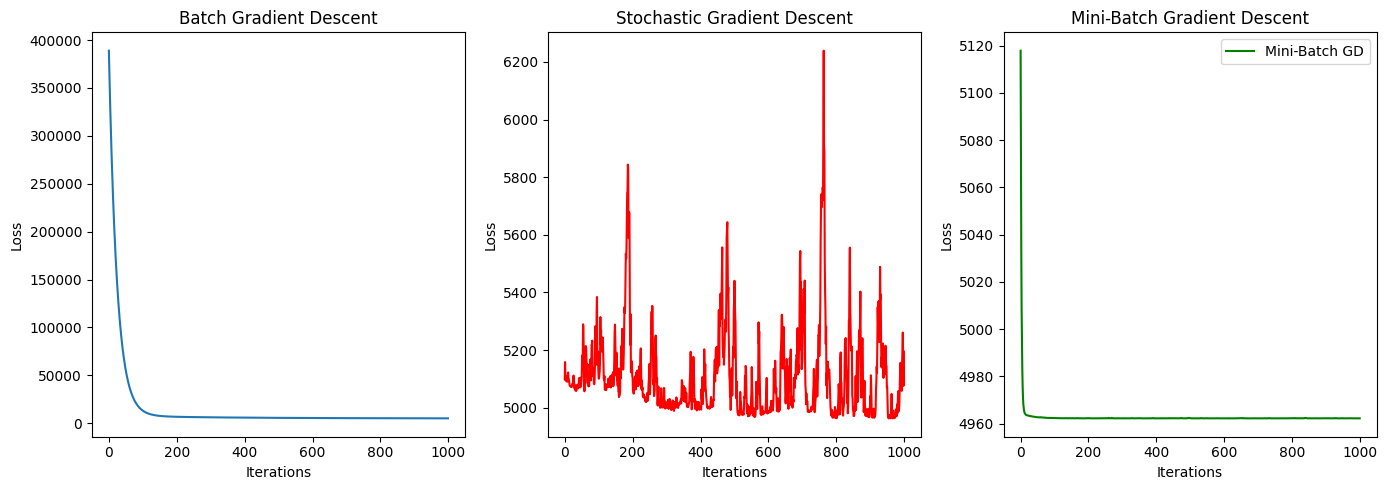

In [8]:
# Plot loss function
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(loss_bgd, label='Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent')

plt.subplot(1, 3, 2)
plt.plot(loss_sgd, label='Stochastic GD', color='r')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent')

plt.subplot(1, 3, 3)
plt.plot(loss_mbgd, label='Mini-Batch GD', color='g')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Mini-Batch Gradient Descent')

plt.tight_layout()
plt.legend()
plt.show()

In [9]:
# Output the final weights, biases, and loss
print(f"Batch GD - Final weights: {weights_bgd}, Final bias: {bias_bgd}, Final loss: {loss_bgd[-1]}")
print(f"Stochastic GD - Final weights: {weights_sgd}, Final bias: {bias_sgd}, Final loss: {loss_sgd[-1]}")
print(f"Mini-Batch GD - Final weights: {weights_mbgd}, Final bias: {bias_mbgd}, Final loss: {loss_mbgd[-1]}")

Batch GD - Final weights: [[2.9681995]], Final bias: [4.22223481], Final loss: 5088.224148496009
Stochastic GD - Final weights: [[2.9681995]], Final bias: [4.22223481], Final loss: 5194.515638942054
Mini-Batch GD - Final weights: [[2.9681995]], Final bias: [4.22223481], Final loss: 4962.193507013914
